In [23]:
from nuscenes.nuscenes import NuScenes
from nuscenes.utils import splits

In [ ]:
nusc = NuScenes(version='v1.0-trainval', dataroot='/Data/Dataset/nuScenes', verbose=True) 
# 전체 train/val 다 불러옴 
# val 만 골라내는건 splits.val 로 nusc.scene 에서 씬 이름골라내면 됨
# 총 850 scene, 34149 sample 인데  34149/850 = 40.1 으로 한 씬당 대략 40 프레임. 한 씬이 대략 20초이므로 대충 2FPS 정도
# 샘플=프레임 개념이라고 보면됨

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 39.278 seconds.
Reverse indexing ...
Done reverse indexing in 9.1 seconds.


In [ ]:
my_scene = nusc.scene[0]
my_scene 
# 전체씬중 첫번째. 40 프레임 들고있음

{'token': '73030fb67d3c46cfb5e590168088ae39',
 'log_token': '6b6513e6c8384cec88775cae30b78c0e',
 'nbr_samples': 40,
 'first_sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'last_sample_token': '40e413c922184255a94f08d3c10037e0',
 'name': 'scene-0001',
 'description': 'Construction, maneuver between several trucks'}

In [34]:
first_sample_token = my_scene['first_sample_token']
first_sample_token

'e93e98b63d3b40209056d129dc53ceee'

In [ ]:
first_sample_token = my_scene['first_sample_token']
first_sample_token
# 씬0의 샘플0의 토큰
# 결국 전체 샘플중 첫번째 샘플이기도함

'e93e98b63d3b40209056d129dc53ceee'

In [38]:
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'e93e98b63d3b40209056d129dc53ceee',
 'timestamp': 1531883530449377,
 'prev': '',
 'next': '14d5adfe50bb4445bc3aa5fe607691a8',
 'scene_token': '73030fb67d3c46cfb5e590168088ae39',
 'data': {'RADAR_FRONT': 'bddd80ae33ec4e32b27fdb3c1160a30e',
  'RADAR_FRONT_LEFT': '1a08aec0958e42ebb37d26612a2cfc57',
  'RADAR_FRONT_RIGHT': '282fa8d7a3f34b68b56fb1e22e697668',
  'RADAR_BACK_LEFT': '05fc4678025246f3adf8e9b8a0a0b13b',
  'RADAR_BACK_RIGHT': '31b8099fb1c44c6381c3c71b335750bb',
  'LIDAR_TOP': '3388933b59444c5db71fade0bbfef470',
  'CAM_FRONT': '020d7b4f858147558106c504f7f31bef',
  'CAM_FRONT_RIGHT': '16d39ff22a8545b0a4ee3236a0fe1c20',
  'CAM_BACK_RIGHT': 'ec7096278e484c9ebe6894a2ad5682e9',
  'CAM_BACK': 'aab35aeccbda42de82b2ff5c278a0d48',
  'CAM_BACK_LEFT': '86e6806d626b4711a6d0f5015b090116',
  'CAM_FRONT_LEFT': '24332e9c554a406f880430f17771b608'},
 'anns': ['173a50411564442ab195e132472fde71',
  '5123ed5e450948ac8dc381772f2ae29a',
  'acce0b7220754600b700257a1de1573d',
  '8d7cb5e96cae48c39

In [43]:
nusc.list_sample(my_sample['token'])
# my_sample['token'] 과 first_sample_token 은 같은 값이다
# nusc.get('sample', first_sample_token) 과 결국 같은 결과인데 위에꺼 보다 가시성이 좋음

Sample: e93e98b63d3b40209056d129dc53ceee

sample_data_token: bddd80ae33ec4e32b27fdb3c1160a30e, mod: radar, channel: RADAR_FRONT
sample_data_token: 1a08aec0958e42ebb37d26612a2cfc57, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 282fa8d7a3f34b68b56fb1e22e697668, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 05fc4678025246f3adf8e9b8a0a0b13b, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 31b8099fb1c44c6381c3c71b335750bb, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 3388933b59444c5db71fade0bbfef470, mod: lidar, channel: LIDAR_TOP
sample_data_token: 020d7b4f858147558106c504f7f31bef, mod: camera, channel: CAM_FRONT
sample_data_token: 16d39ff22a8545b0a4ee3236a0fe1c20, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: ec7096278e484c9ebe6894a2ad5682e9, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: aab35aeccbda42de82b2ff5c278a0d48, mod: camera, channel: CAM_BACK
sample_data_token: 86e6806d626b4711a6d0f5015b090116, mod: camera, channel:

In [45]:
my_sample['data']

{'RADAR_FRONT': 'bddd80ae33ec4e32b27fdb3c1160a30e',
 'RADAR_FRONT_LEFT': '1a08aec0958e42ebb37d26612a2cfc57',
 'RADAR_FRONT_RIGHT': '282fa8d7a3f34b68b56fb1e22e697668',
 'RADAR_BACK_LEFT': '05fc4678025246f3adf8e9b8a0a0b13b',
 'RADAR_BACK_RIGHT': '31b8099fb1c44c6381c3c71b335750bb',
 'LIDAR_TOP': '3388933b59444c5db71fade0bbfef470',
 'CAM_FRONT': '020d7b4f858147558106c504f7f31bef',
 'CAM_FRONT_RIGHT': '16d39ff22a8545b0a4ee3236a0fe1c20',
 'CAM_BACK_RIGHT': 'ec7096278e484c9ebe6894a2ad5682e9',
 'CAM_BACK': 'aab35aeccbda42de82b2ff5c278a0d48',
 'CAM_BACK_LEFT': '86e6806d626b4711a6d0f5015b090116',
 'CAM_FRONT_LEFT': '24332e9c554a406f880430f17771b608'}

In [46]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': '020d7b4f858147558106c504f7f31bef',
 'sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'ego_pose_token': '020d7b4f858147558106c504f7f31bef',
 'calibrated_sensor_token': '2e64b091b3b146a390c2606b9081343c',
 'timestamp': 1531883530412470,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-18-11-07-57+0800__CAM_FRONT__1531883530412470.jpg',
 'prev': '',
 'next': 'caa2bfad0b8a4a8090cb0b803352cbc8',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

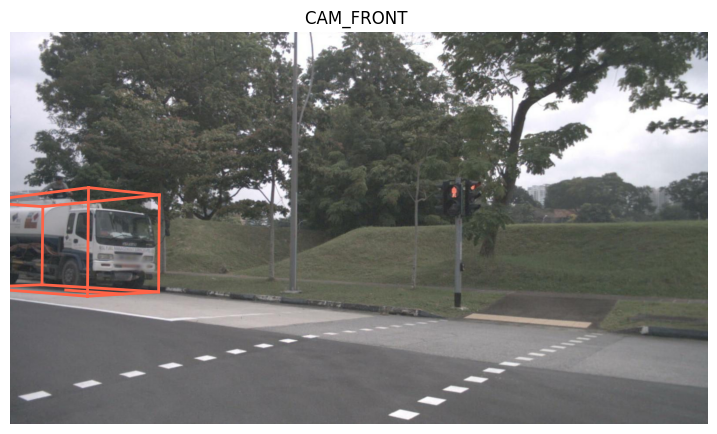

In [50]:
nusc.render_sample_data(cam_front_data['token'])

In [53]:
my_annotation_token = my_sample['anns'][2]
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
my_annotation_metadata

{'token': 'acce0b7220754600b700257a1de1573d',
 'sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'instance_token': '39b6c31c9925492a8a9f1b0ef3b877b6',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [1002.464, 632.267, 1.936],
 'size': [2.312, 7.516, 3.093],
 'rotation': [0.9343569321017062, 0.0, 0.0, -0.35633849558178193],
 'prev': '',
 'next': '4b1c1acb00c04dfe84e54f64a8381649',
 'num_lidar_pts': 171,
 'num_radar_pts': 7,
 'category_name': 'vehicle.truck'}

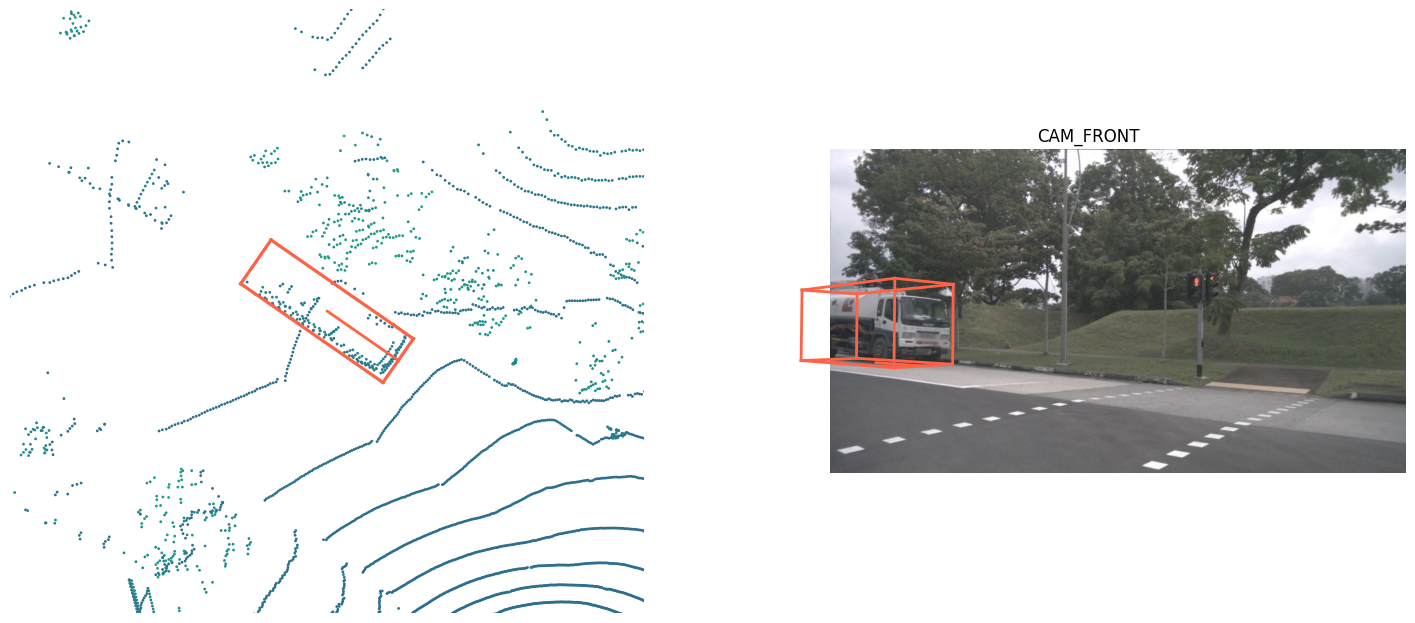

In [54]:
nusc.render_annotation(my_annotation_token)

In [ ]:
my_instance = nusc.instance[4]
my_instance
# instance : 누씬스 데이터셋 전체에 나타나는 독자적인 객체
# token : 해당 instance 의 식별자
# category_token : 카테고리.  nusc.get('category',my_instance['category_token']) 이런식으로 확인 가능
# nbr_annotations : 이 instance에 대해 존재하는 총 annotation 개수. 즉, 이 객체가 몇 개의 샘플(프레임)에 존재하는지
# first_annotation_token : 이 instance가 등장하는 첫번째 anno
# last_annotation_token  : 이 instance가 등장하는 마지막 anno
# 기본적으로 한 instance 는 한씬에만 등장 (그런데 카메라는 바껴서 나올수 있는듯)

{'token': '39b6c31c9925492a8a9f1b0ef3b877b6',
 'category_token': '6021b5187b924d64be64a702e5570edf',
 'nbr_annotations': 40,
 'first_annotation_token': 'acce0b7220754600b700257a1de1573d',
 'last_annotation_token': 'b5cd977a4d054c31936464f9e6201820'}

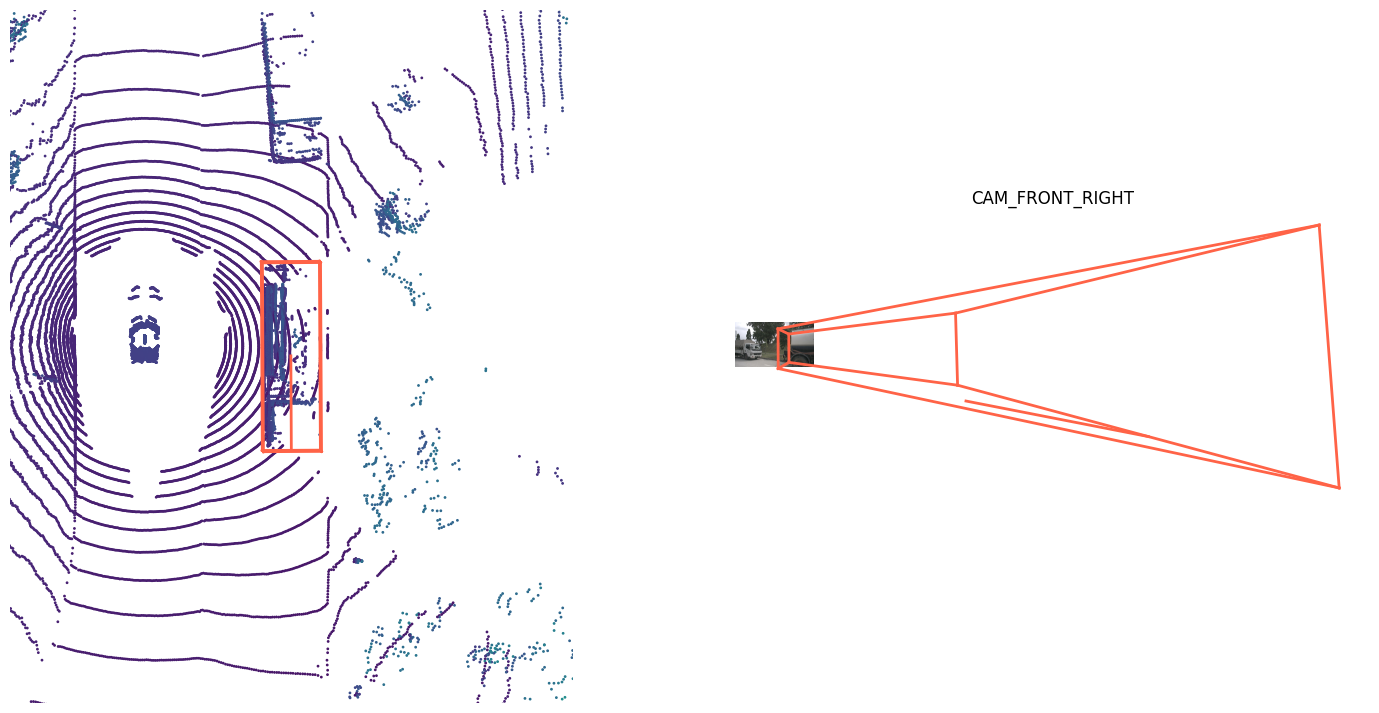

In [82]:
instance_token = my_instance['token']
nusc.render_instance(instance_token)

First annotated sample of this instance:


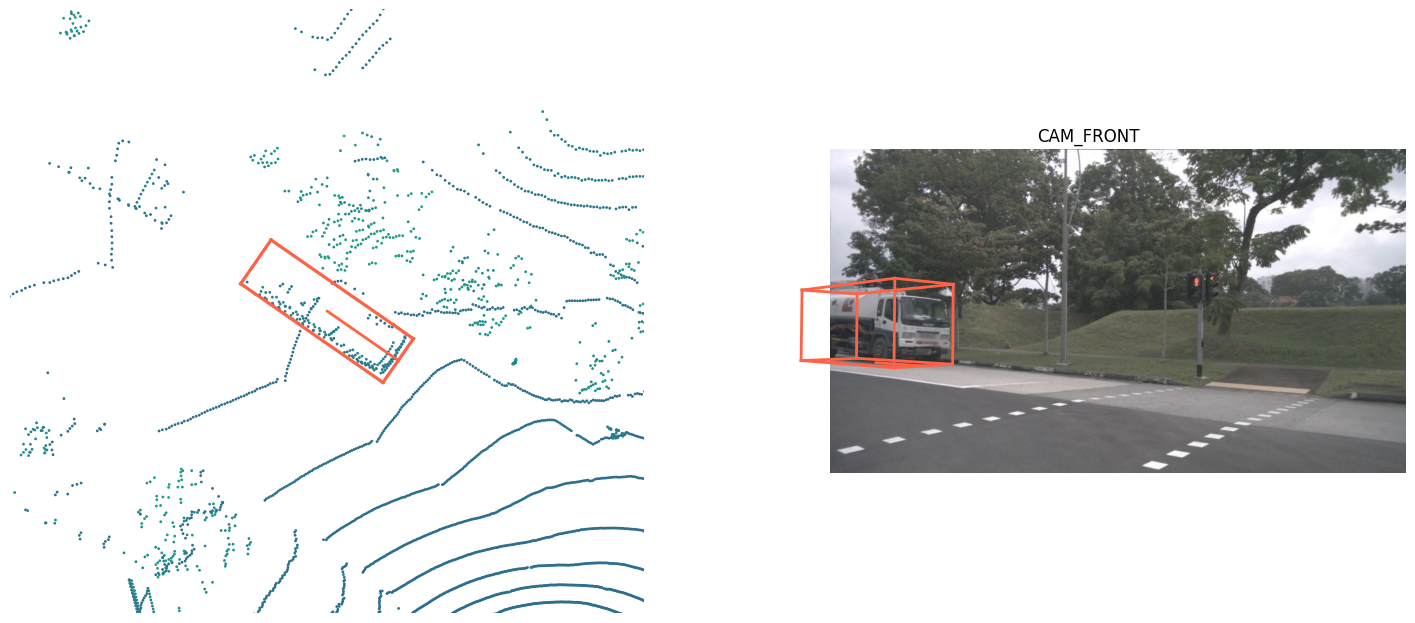

In [83]:
print("First annotated sample of this instance:")
nusc.render_annotation(my_instance['first_annotation_token'])

Last annotated sample of this instance


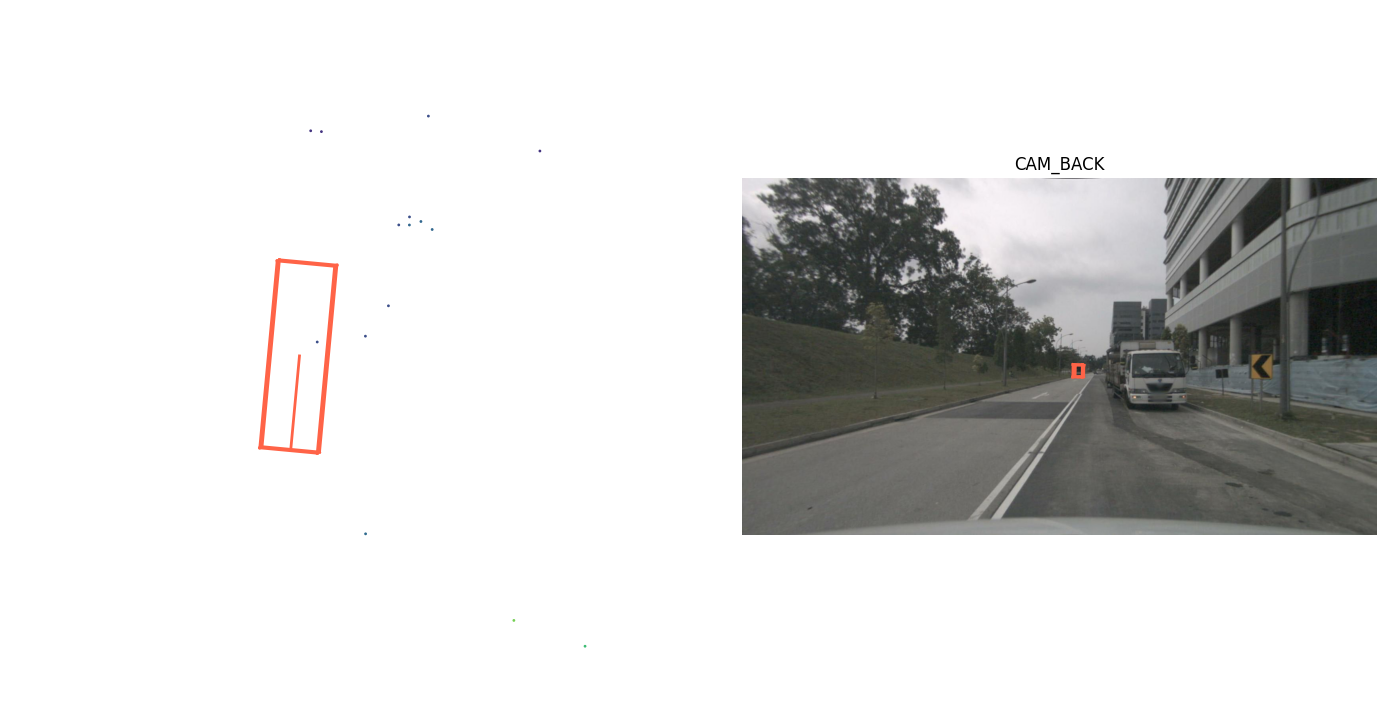

In [84]:
print("Last annotated sample of this instance")
nusc.render_annotation(my_instance['last_annotation_token'])

In [85]:
nusc.list_categories()

Category stats for split v1.0-trainval:
animal                      n=  787, width= 0.37±0.13, len= 0.86±0.36, height= 0.60±0.20, lw_aspect= 2.35±0.69
human.pedestrian.adult      n=208240, width= 0.67±0.13, len= 0.73±0.19, height= 1.77±0.18, lw_aspect= 1.11±0.26
human.pedestrian.child      n= 2066, width= 0.51±0.14, len= 0.53±0.15, height= 1.38±0.25, lw_aspect= 1.05±0.23
human.pedestrian.constructi n= 9161, width= 0.72±0.20, len= 0.71±0.20, height= 1.74±0.30, lw_aspect= 1.02±0.29
human.pedestrian.personal_m n=  395, width= 0.62±0.12, len= 1.18±0.31, height= 1.71±0.27, lw_aspect= 1.98±0.64
human.pedestrian.police_off n=  727, width= 0.73±0.14, len= 0.69±0.13, height= 1.83±0.14, lw_aspect= 0.97±0.18
human.pedestrian.stroller   n= 1072, width= 0.63±0.13, len= 0.95±0.27, height= 1.17±0.15, lw_aspect= 1.58±0.68
human.pedestrian.wheelchair n=  503, width= 0.77±0.10, len= 1.09±0.23, height= 1.37±0.09, lw_aspect= 1.42±0.23
movable_object.barrier      n=152087, width= 2.53±0.64, len= 0.50±0.17,

In [86]:
nusc.category[9]

{'token': 'dfd26f200ade4d24b540184e16050022',
 'name': 'vehicle.motorcycle',
 'description': 'Gasoline or electric powered 2-wheeled vehicle designed to move rapidly (at the speed of standard cars) on the road surface. This category includes all motorcycles, vespas and scooters.'}

In [88]:
nusc.list_attributes()
# 카테고리별 특성  

cycle.with_rider: 7331
cycle.without_rider: 17345
pedestrian.moving: 157444
pedestrian.sitting_lying_down: 13939
pedestrian.standing: 46530
vehicle.moving: 149203
vehicle.parked: 420226
vehicle.stopped: 65975


In [91]:
nusc.visibility
# 물체의 가시성 (얼마나 가렸나)

[{'description': 'visibility of whole object is between 0 and 40%',
  'token': '1',
  'level': 'v0-40'},
 {'description': 'visibility of whole object is between 40 and 60%',
  'token': '2',
  'level': 'v40-60'},
 {'description': 'visibility of whole object is between 60 and 80%',
  'token': '3',
  'level': 'v60-80'},
 {'description': 'visibility of whole object is between 80 and 100%',
  'token': '4',
  'level': 'v80-100'}]

In [109]:
nusc.sensor[0]
# 센서 : 6 cam 1 lidar 5 radar

{'token': '725903f5b62f56118f4094b46a4470d8',
 'channel': 'CAM_FRONT',
 'modality': 'camera'}

In [107]:
nusc.sample_data[1]
#  sample 이아님. nusc.sample_data 에 들어가는 idx 는 각 샘플의 각 센서에 대한 토큰임

{'token': '90df03ad4710427aabb5f88fe049df2e',
 'sample_token': '14d5adfe50bb4445bc3aa5fe607691a8',
 'ego_pose_token': '90df03ad4710427aabb5f88fe049df2e',
 'calibrated_sensor_token': '7781065816974801afc4dcdaf6acf92c',
 'timestamp': 1531883530510442,
 'fileformat': 'pcd',
 'is_key_frame': False,
 'height': 0,
 'width': 0,
 'filename': 'sweeps/RADAR_FRONT/n015-2018-07-18-11-07-57+0800__RADAR_FRONT__1531883530510442.pcd',
 'prev': 'bddd80ae33ec4e32b27fdb3c1160a30e',
 'next': '28e6129458c745dbbcbdbb3329e91575',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

In [ ]:
nusc.calibrated_sensor[0],nusc.calibrated_sensor.__len__()
#  각 씬의 에고 차량의 센서에 대한 보정값
# sensor_token : 어떤 센서인지? cam lidar radar
# translation : 에고차량 중심으로 부터 센서위치
# rotation :  어느방향으로?
# camera_intrinsic : 해당센서가 카메라일 경우 초점거리, 주점 정보
# 12센서 * 850 씬 = 10200


({'token': '7781065816974801afc4dcdaf6acf92c',
  'sensor_token': '47fcd48f71d75e0da5c8c1704a9bfe0a',
  'translation': [3.412, 0.0, 0.5],
  'rotation': [0.9999984769132877, 0.0, 0.0, 0.0017453283658983088],
  'camera_intrinsic': []},
 10200)

In [ ]:
nusc.ego_pose[1],nusc.ego_pose.__len__()
# 에고 차량의 전역 좌표계에서의 위치 및 방향
# token: 해당 ego_pose 레코드의 고유 식별자입니다.
# translation: 전역 좌표계에서 ego 차량의 위치를 나타내는 3차원 벡터 [x, y, z] 
# rotation: 전역 좌표계에서 ego 차량의 방향(자세)을 나타내는 쿼터니언 [w, x, y, z]
# timestamp: 해당 포즈가 기록된 시각의 타임스탬프 (마이크로초 단위)
# 센서 좌표계 <-> ego 차량 좌표계 (via calibrated_sensor)
# ego 차량 좌표계 <-> 전역 좌표계 (via ego_pose)

# 샘플 개수만큼 존재 = 샘플 데이터 마다 존재

({'token': '90df03ad4710427aabb5f88fe049df2e',
  'timestamp': 1531883530510442,
  'rotation': [-0.743742073537717,
   -0.007726799292098994,
   0.008375154888041067,
   -0.6683695694771852],
  'translation': [1010.1677992044663, 611.0752573625425, 0.0]},
 2631083)

In [119]:
print("Number of `logs` in our loaded database: {}".format(len(nusc.log)))

Number of `logs` in our loaded database: 68


In [132]:
print("There are {} maps masks in the loaded dataset".format(len(nusc.map)))

There are 4 maps masks in the loaded dataset


In [133]:
nusc.map[0]

{'category': 'semantic_prior',
 'token': '53992ee3023e5494b90c316c183be829',
 'filename': 'maps/53992ee3023e5494b90c316c183be829.png',
 'log_tokens': ['0986cb758b1d43fdaa051ab23d45582b',
  '1c9b302455ff44a9a290c372b31aa3ce',
  'e60234ec7c324789ac7c8441a5e49731',
  '46123a03f41e4657adc82ed9ddbe0ba2',
  'a5bb7f9dd1884f1ea0de299caefe7ef4',
  'bc41a49366734ebf978d6a71981537dc',
  'f8699afb7a2247e38549e4d250b4581b',
  'd0450edaed4a46f898403f45fa9e5f0d',
  'f38ef5a1e9c941aabb2155768670b92a',
  '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
  'ddc03471df3e4c9bb9663629a4097743',
  '31e9939f05c1485b88a8f68ad2cf9fa4',
  '783683d957054175bda1b326453a13f4',
  '343d984344e440c7952d1e403b572b2a',
  '92af2609d31445e5a71b2d895376fed6',
  '47620afea3c443f6a761e885273cb531',
  'd31dc715d1c34b99bd5afb0e3aea26ed',
  '34d0574ea8f340179c82162c6ac069bc',
  'd7fd2bb9696d43af901326664e42340b',
  'b5622d4dcb0d4549b813b3ffb96fbdc9',
  'da04ae0b72024818a6219d8dd138ea4b',
  '6b6513e6c8384cec88775cae30b78c0e',
  'eda311bda86f